In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
df.shape

(178, 14)

In [31]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [32]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [33]:
# Drop the 'class' column
df1 = df.drop('Type', axis=1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [35]:
df.duplicated()
df1[df1.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [36]:
# Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df2 = SS.fit_transform(df1)
df2 = pd.DataFrame(df2)

In [37]:
# PCA Implementation

from sklearn.decomposition import PCA
pca = PCA()
Y = pca.fit_transform(df2)

In [38]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [39]:
# The amount of variance that each PCA has
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [40]:
# Cummulative variance of each PCA
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

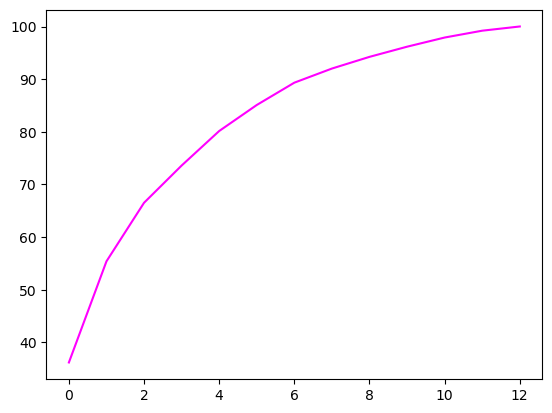

In [42]:
# Variance plot for PCA components obtained 
import matplotlib.pyplot as plt
plt.plot(var1,color = 'magenta')

In [43]:
# Final Dataframe
final_df = pd.concat([df['Type'],pd.DataFrame(Y[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


<Axes: >

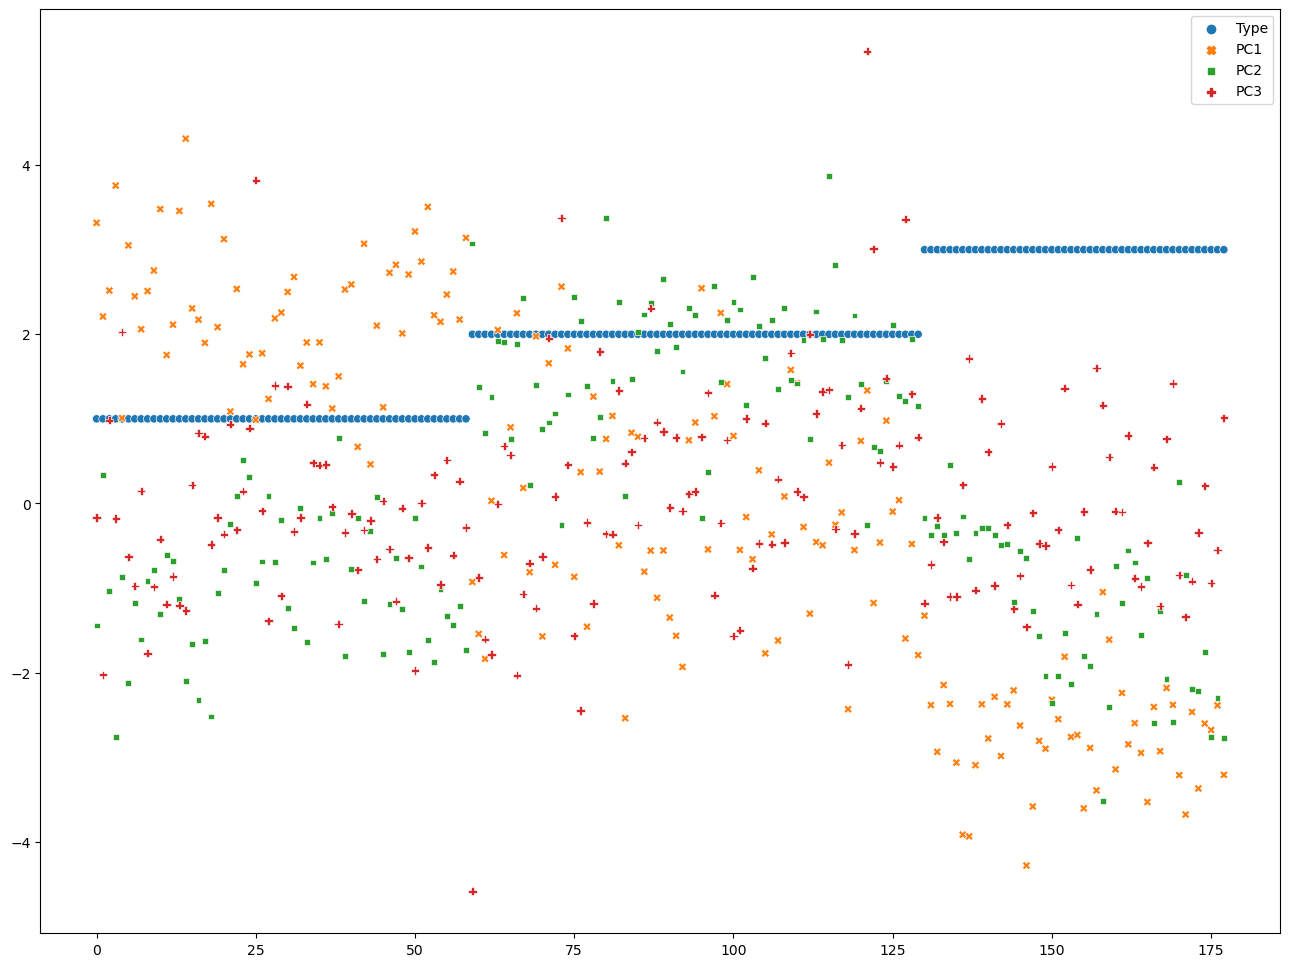

In [44]:
#  Visualization of PCAs
import seaborn as sns
fig = plt.figure(figsize=(16,12))
sns.scatterplot(data = final_df)

In [ ]:
## Performing Hierarchical Agglomerative Clustering on PCA components.

In [68]:
#  Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_df_normal = scaler.fit_transform(final_df)
print(final_df_normal)

[[0.         0.88409355 0.28044707 0.44502757]
 [0.         0.75524083 0.52098937 0.25765258]
 [0.         0.79099786 0.33626383 0.56068773]
 [0.         0.93533214 0.10271162 0.44397497]
 [0.         0.6155344  0.35810263 0.66580576]
 [0.         0.85308182 0.18853559 0.39833717]
 [0.         0.7831255  0.31681056 0.36332375]
 [0.         0.73778236 0.25804241 0.47644818]
 [0.         0.79031526 0.35157211 0.28338035]
 [0.         0.81856406 0.36898588 0.36260348]
 [0.         0.9030599  0.2995525  0.41914796]
 [0.         0.70232687 0.39300963 0.34179568]
 [0.         0.7440692  0.38438229 0.37460304]
 [0.         0.9005487  0.32279689 0.3404465 ]
 [0.         1.         0.19211296 0.33444109]
 [0.         0.76637997 0.25078783 0.48366041]
 [0.         0.75087591 0.16079663 0.54547303]
 [0.         0.71910927 0.25500921 0.54176564]
 [0.         0.91030363 0.13493476 0.4128317 ]
 [0.         0.74070149 0.33220437 0.4451275 ]
 [0.         0.86171036 0.36932981 0.42497329]
 [0.         

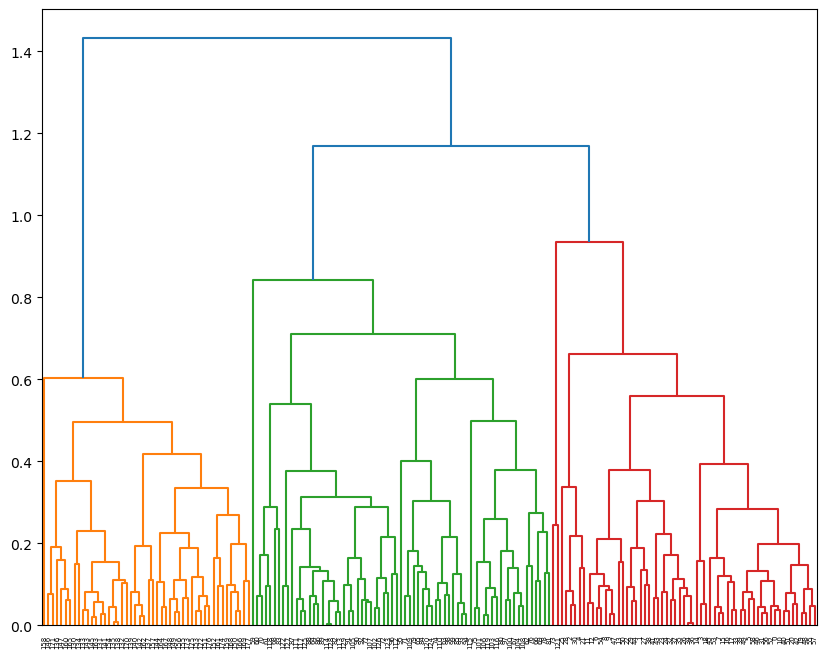

In [69]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(final_df_normal,'complete'))

In [60]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [61]:
y=pd.DataFrame(H_clusters.fit_predict(final_df_normal),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clustersid_H
0    71
1    59
2    48
Name: count, dtype: int64

In [ ]:
## Performing K-MEANS Clustering on PCA components

In [63]:
from sklearn.cluster import KMeans

C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

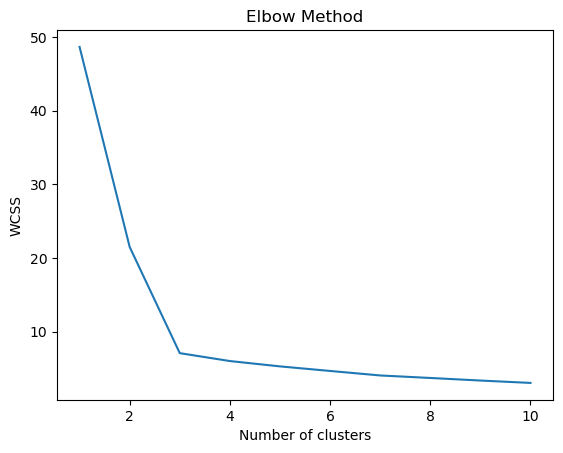

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(final_df_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#Build Cluster algorithm

KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(final_df_normal)

C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [67]:
y=pd.DataFrame(KM_clusters.fit_predict(final_df_normal),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


clusterid_Kmeans
0    71
2    59
1    48
Name: count, dtype: int64

In [ ]:
## Preparing Actual Vs. Predicted Clusering Data

In [70]:
wine_class = df['Type']
wine_class = pd.Series(wine_class)

In [71]:
clustersid_HC = H_clusters.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [72]:
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [73]:
pred_df = pd.concat([wine_class, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,Type,0,1
0,1,1,2
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,2
...,...,...,...
173,3,2,1
174,3,2,1
175,3,2,1
176,3,2,1
